# [Othaim Markets](https://www.othaimmarkets.com/grocery.html) Web scraping 
 
 

In [9]:
# import liabraries  
# open the shop page 
#start to grap the reviews 
# clean Data

## import libraries

In [163]:
import pandas as pd
from bs4 import BeautifulSoup
from time import sleep
from selenium import webdriver
import numpy as np
from scipy import  stats
import matplotlib.pyplot  as plt
import seaborn as sns
import re
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC



## open chrome page

In [84]:
# create browser obj 
# !you should download chromedriver  and change executable_path based on chromedriver.exe location
driver = webdriver.Chrome('/Users/abrar2afar/Documents/chromedriver-2')


# open shop page

In [85]:
driver.get('https://www.othaimmarkets.com/grocery/rice-sugar.html')
sleep(5)

# load page in variable

In [34]:
# save the code for the page
html = driver.page_source
soup = BeautifulSoup(html,'html')

## scroll down for all pages 


In [86]:
wait = WebDriverWait(driver, 10)

while True:
    # do the scrolling
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

    try:
        wait.until(EC.visibility_of_element_located((By.XPATH, "//*[. = 'Loading...']")))
    except:
        print('finish')
        break  # not more posts were loaded - exit the loop

finish


In [87]:
# save the code for the page
html = driver.page_source
soup = BeautifulSoup(html,'html')


In [88]:
#get items 
item_name=[]
item_price=[]
for i in soup.find_all(name='div',attrs={'class':"wrapper-hover"}):
        item_name.append(i.find('h3', class_="product-name").text)
        
for i in soup.find_all(name='span',attrs={'class':"regular-price"}):
         item_price.append(i.find('span', class_="price").text)

In [89]:
item_name

['ارز باب الهند بنجابي 5 كيلو',
 'ارز زاد الوطن مزة 40كيلو',
 'ارز أبو كاس مزة بسمتي 5 كيلو',
 'ارز الشعلان بسمتي مزة 20كيلو',
 'ارز هالي كالروز مصري 5كيلو',
 'ارز جرين فارمز كرنل ابيض 10كيلو',
 'ارز جرين فارمز كرنل ابيض 5كيلو',
 'ارز ملك الارز بسمتي مزة 10كيلو',
 'ارز هالي سيلا بسمتي 10كيلو',
 'ارز هالي برمل 40 كيلو',
 'ارز الشعلان مزة بسمتي 5 كيلو',
 'ارز مالجروسا تايلندي 10 كيلو',
 'ارز ابو بنتين 10 كيلو',
 'ارز باب الهند بنجابي 40 كيلو',
 'ارز العائلة بسمتي ابيض 5 كيلو',
 'ارز العائلة بسمتي ابيض 10 كيلو',
 'ارز الشعلان مزة بسمتي 10ك',
 'ارز الوسام بسمتي 5 كيلو',
 'ارز الوسام بسمتي 10 كيلو',
 'ارز زاد الوطن مزة 10 كيلو',
 'ارز بوندي مزة هندي 40 كيلو',
 'ارز المضياف عنبر باكستاني 10 كيلو',
 'ارز هالي برمل مزة 10ك',
 'ارز المضياف عنبر باكستاني 5ك',
 'سكر النحلة قوالب 1كيلو',
 'سكر الاسرة خشن 5 كيلو',
 'سكر خشن سعودي كيس 50كيلو',
 'سكر النحلة قوالب 500جرام',
 'سكر حلواني توب توب قوالب 1كيلو',
 'سكر حلواني توب توب قوالب 500جرام',
 'ارز ميسم بسمتي سيلا هندي ١٠كجم',
 'ارز تيجان مزه هندي ب

In [90]:
item_price

[' SR 45.95 ريال ',
 ' SR 194.20 ريال ',
 ' SR 34.95 ريال ',
 ' SR 133.95 ريال ',
 ' SR 28.30 ريال ',
 ' SR 59.95 ريال ',
 ' SR 31.95 ريال ',
 ' SR 70.88 ريال ',
 ' SR 65.05 ريال ',
 ' SR 126.00 ريال ',
 ' SR 34.95 ريال ',
 ' SR 66.95 ريال ',
 ' SR 47.50 ريال ',
 ' SR 322.35 ريال ',
 ' SR 44.95 ريال ',
 ' SR 79.95 ريال ',
 ' SR 68.95 ريال ',
 ' SR 40.95 ريال ',
 ' SR 79.95 ريال ',
 ' SR 49.30 ريال ',
 ' SR 299.25 ريال ',
 ' SR 62.95 ريال ',
 ' SR 33.60 ريال ',
 ' SR 33.95 ريال ',
 ' SR 13.95 ريال ',
 ' SR 18.95 ريال ',
 ' SR 124.00 ريال ',
 ' SR 7.30 ريال ',
 ' SR 9.72 ريال ',
 ' SR 5.52 ريال ',
 ' SR 68.20 ريال ',
 ' SR 62.95 ريال ',
 ' SR 24.10 ريال ',
 ' SR 40.70 ريال ',
 ' SR 6.83 ريال ',
 ' SR 31.45 ريال ',
 ' SR 13.13 ريال ',
 ' SR 9.40 ريال ',
 ' SR 16.75 ريال ',
 ' SR 31.45 ريال ',
 ' SR 17.33 ريال ',
 ' SR 23.95 ريال ',
 ' SR 7.88 ريال ',
 ' SR 17.80 ريال ',
 ' SR 7.75 ريال ',
 ' SR 4.15 ريال ',
 ' SR 30.40 ريال ',
 ' SR 22.95 ريال ',
 ' SR 46.95 ريال ',
 ' SR 62.48 ريال ',
 '

In [91]:
len(item_price)

100

In [96]:
len(item_name)

100

## Create data frame and save the result

In [97]:
#dict
data= {'item':item_name , 'price':item_price}

In [99]:
df = pd.DataFrame.from_dict(data)

In [100]:
df.to_csv('/Users/abrar2afar/Documents/othaim.csv')

In [115]:
#adding date for records
df['date'] = pd.date_range(start='05/09/2020',end='05/09/2020', periods=len(df))

In [123]:
df.set_index(df['date'], inplace=True) 

In [140]:
df= df.drop(['date'], axis=1)

## Cleaning Data

In [188]:
#seprating quantity from the item into a new column 
df

,item,price
date,,
2020-05-09,ارز باب الهند بنجابي 5 كيلو,SR 45.95 ريال
2020-05-09,ارز زاد الوطن مزة 40كيلو,SR 194.20 ريال
2020-05-09,ارز أبو كاس مزة بسمتي 5 كيلو,SR 34.95 ريال
2020-05-09,ارز الشعلان بسمتي مزة 20كيلو,SR 133.95 ريال
2020-05-09,ارز هالي كالروز مصري 5كيلو,SR 28.30 ريال
2020-05-09,ارز جرين فارمز كرنل ابيض 10كيلو,SR 59.95 ريال
2020-05-09,ارز جرين فارمز كرنل ابيض 5كيلو,SR 31.95 ريال
2020-05-09,ارز ملك الارز بسمتي مزة 10كيلو,SR 70.88 ريال
2020-05-09,ارز هالي سيلا بسمتي 10كيلو,SR 65.05 ريال


In [248]:
#seperating name of item 2 quantity and unit 





# Extract name from the string  
df['Item'] = df['item'].str.extract('(\D\W*)', expand=True) 
#df['Quantity1'] = df['item'].str.extract('(\d\)', expand=True)  
# Extract year from the string  
#df['unit'] = df['item'].str.extract('(\d\d\d\d)', expand=True) 
  
# Extract rating from the string  
#df['Rating'] = df['movie_data'].str.extract('(\d\.\d)', expand=True) 
df

,item,price,quantity,Item,Quantity
date,,,,,
2020-05-09,ارز باب الهند بنجابي 5 كيلو,SR 45.95 ريال,NaN,ا,NaN
2020-05-09,ارز زاد الوطن مزة 40كيلو,SR 194.20 ريال,NaN,ا,NaN
2020-05-09,ارز أبو كاس مزة بسمتي 5 كيلو,SR 34.95 ريال,NaN,ا,NaN
2020-05-09,ارز الشعلان بسمتي مزة 20كيلو,SR 133.95 ريال,NaN,ا,NaN
2020-05-09,ارز هالي كالروز مصري 5كيلو,SR 28.30 ريال,NaN,ا,NaN
2020-05-09,ارز جرين فارمز كرنل ابيض 10كيلو,SR 59.95 ريال,NaN,ا,NaN
2020-05-09,ارز جرين فارمز كرنل ابيض 5كيلو,SR 31.95 ريال,NaN,ا,NaN
2020-05-09,ارز ملك الارز بسمتي مزة 10كيلو,SR 70.88 ريال,NaN,ا,NaN
2020-05-09,ارز هالي سيلا بسمتي 10كيلو,SR 65.05 ريال,NaN,ا,NaN


## Data Visualzation 

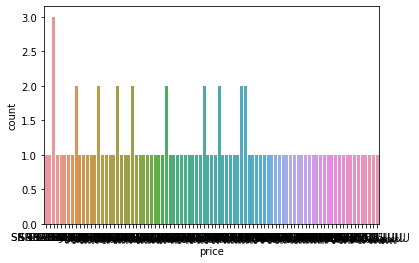

In [103]:
sns.countplot(df.price)

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Driving Licenses VS Traffic Accidents for 2017')

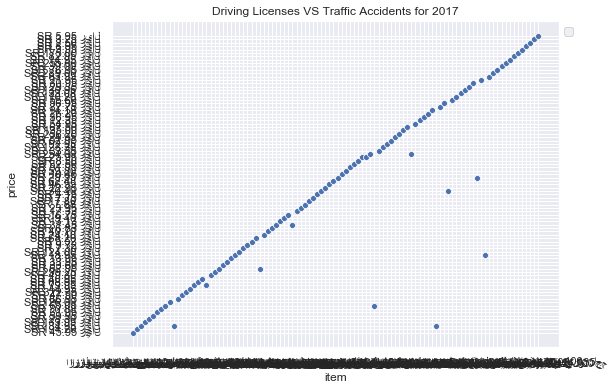

In [252]:
sns.set(style="darkgrid")

fig=plt.figure(figsize=(8,6))
ax=fig.gca()
sns.scatterplot(data=df ,x='item', y='price')
plt.legend(bbox_to_anchor=(1,1), loc=2)

plt.title('Driving Licenses VS Traffic Accidents for 2017')